# Baby-Step, Giant-Step algorithm

$g^x = h$ mod $p$

In [1]:
import math

In [2]:
def discrete_log(g, h, p):
    N = int(math.ceil(math.sqrt(p - 1))) 

    t = {}

    for i in range(N):
        t[power_mod(g, i, p)]=i

    c = power_mod(g, N * (p - 2), p)
 
    for j in range(N):
        y = (h * power_mod(c, j, p)) % p
        if y in t: 
            return j * N + t[y]
        
    return None

# Examples

$7^x = 21$ mod $23$

In [3]:
x = discrete_log(7,21,23)
x

3

In [4]:
power_mod(7,x,23)

21

$7^y = 4$ mod $23$

In [5]:
y = discrete_log(7,4,23)
y

6

In [6]:
power_mod(7,y,23)

4

# Time vs no. of bits

In [7]:
from datetime import datetime
from matplotlib import pyplot as plt



In [8]:
g = 7
h = 18

time_req = []
x = []
for i in range(1,41):
    
    p = next_prime(2**i)
    
    start = datetime.now()
    result = discrete_log(g, h, p)
    end = datetime.now()
    
    if result:
        x.append(p.nbits())
        time_req.append( (end-start).total_seconds() )
        

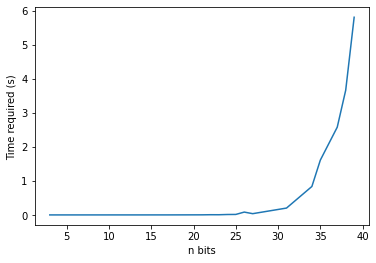

In [9]:
plt.xlabel('n bits')
plt.ylabel('Time required (s)')
plt.plot(x,time_req)
plt.show()

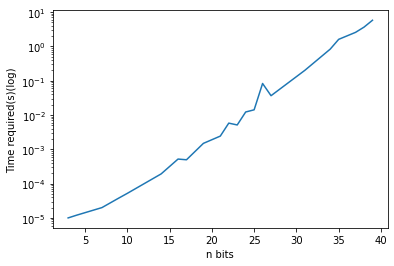

In [10]:
plt.xlabel('n bits')
plt.ylabel('Time required(s)(log)')
plt.yscale("log")
plt.plot(x,time_req)
plt.show()

# Predicting the time required to solve 1024 bits discrete log problem

In [11]:
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [12]:
y = np.log10(time_req)
linreg = linregress(x,y)
linreg

LinregressResult(slope=0.16837309998137373, intercept=-5.894936039121077, rvalue=0.994458019011032, pvalue=4.820489135570517e-21, stderr=0.003980303802281611)

In [13]:
def predict(x):
    return linreg.slope*x+linreg.intercept

In [14]:
xx = np.arange(50)
predict_y = predict(xx)

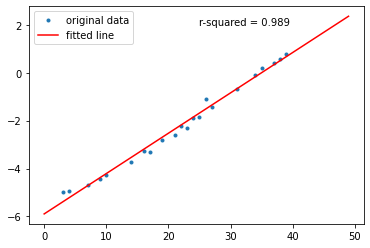

In [15]:
plt.plot(x,np.log10(time_req),'.',label='original data')
plt.plot(xx,predict_y,'r-', label='fitted line')
plt.annotate("r-squared = {:.3f}".format(linreg.rvalue**2), (25, 2))

plt.legend()
plt.show()

In [16]:
print('Predicted time required to solve 1024 bits discret log problem: {:.2e}s'.format(10^predict(1024)))

Predicted time required to solve 1024 bits discret log problem: 3.30e+166s
